In [18]:
import pandas as pd
import seaborn as sns

from src.utils import deserialize_data, NUMERICAL_COLUMNS, CATEGORICAL_COLUMNS

In [19]:
X_TRAIN_PATH = "../data/interim/X_train.pkl"
Y_TRAIN_PATH = "../data/interim/y_train.pkl"

In [20]:
X_train = deserialize_data(X_TRAIN_PATH)
y_train = deserialize_data(Y_TRAIN_PATH)

In [21]:
X_train.head()

,age,income,home_ownership,employment_length,loan_intent,loan_grade,loan_amount,loan_interest_rate,loan_percent_income,cb_person_default_on_file,credit_history_length
32377,64,46000,RENT,2.0,PERSONAL,C,4800,11.09,0.10,Y,24
1338,26,26000,OWN,0.0,DEBTCONSOLIDATION,E,8500,16.45,0.33,N,3
7047,23,51000,MORTGAGE,3.0,PERSONAL,C,16000,13.11,0.31,Y,3
8225,22,56004,MORTGAGE,6.0,MEDICAL,A,6000,7.88,0.11,N,4
7178,24,79000,RENT,3.0,PERSONAL,C,7000,12.54,0.09,N,3


In [22]:
y_train.head()

32377    0
1338     1
7047     0
8225     0
7178     0
Name: loan_status, dtype: int64

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 32377 to 23654
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        26064 non-null  int64  
 1   income                     26064 non-null  int64  
 2   home_ownership             26064 non-null  object 
 3   employment_length          25347 non-null  float64
 4   loan_intent                26064 non-null  object 
 5   loan_grade                 26064 non-null  object 
 6   loan_amount                26064 non-null  int64  
 7   loan_interest_rate         23585 non-null  float64
 8   loan_percent_income        26064 non-null  float64
 9   cb_person_default_on_file  26064 non-null  object 
 10  credit_history_length      26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


In [25]:
X_train.duplicated(keep=False)

32377    False
1338     False
7047     False
8225     False
7178     False
         ...  
29802    False
5390     False
860      False
15795    False
23654    False
Length: 26064, dtype: bool

In [26]:
X_train.isnull().sum()

age                             0
income                          0
home_ownership                  0
employment_length             717
loan_intent                     0
loan_grade                      0
loan_amount                     0
loan_interest_rate           2479
loan_percent_income             0
cb_person_default_on_file       0
credit_history_length           0
dtype: int64

In [27]:
X_train_numerical = X_train[NUMERICAL_COLUMNS]

In [28]:
X_train_numerical

,age,income,employment_length,loan_amount,loan_interest_rate,loan_percent_income,credit_history_length
32377,64,46000,2.0,4800,11.09,0.10,24
1338,26,26000,0.0,8500,16.45,0.33,3
7047,23,51000,3.0,16000,13.11,0.31,3
8225,22,56004,6.0,6000,7.88,0.11,4
7178,24,79000,3.0,7000,12.54,0.09,3
...,...,...,...,...,...,...,...
29802,39,38500,7.0,3500,13.98,0.09,17
5390,25,69000,5.0,8500,6.92,0.12,4
860,26,148000,1.0,20000,17.99,0.14,3
15795,26,175000,0.0,15000,NaN,0.09,3


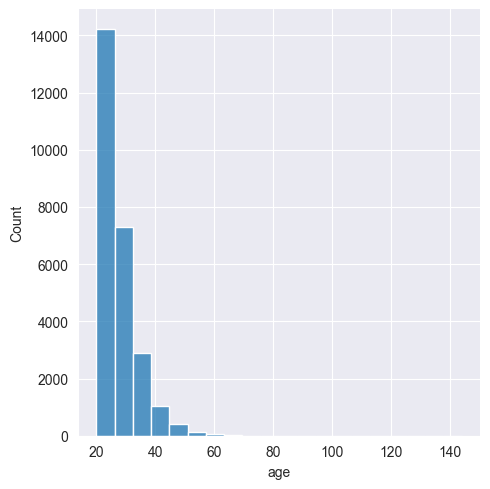

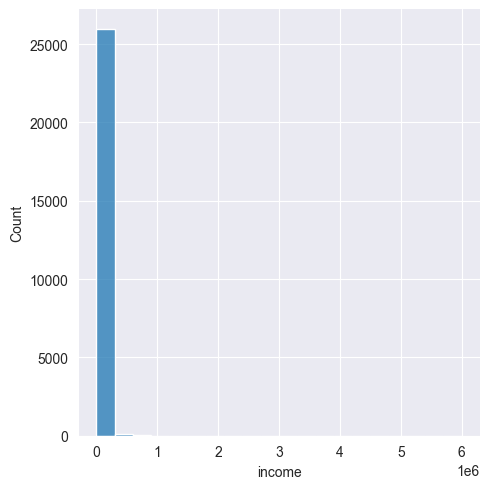

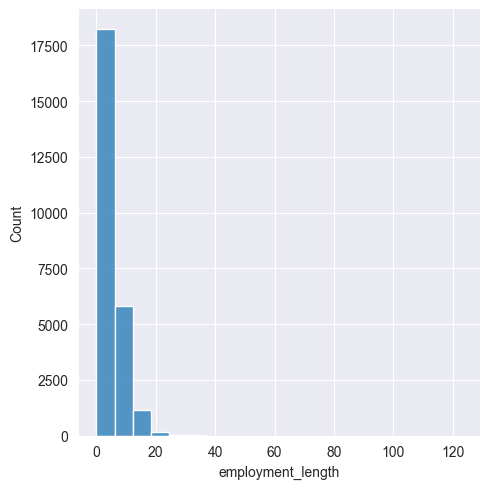

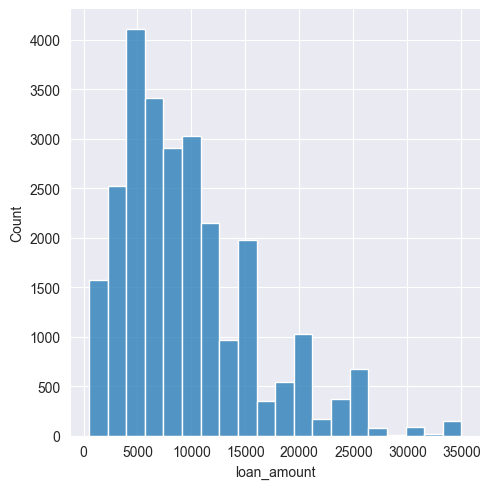

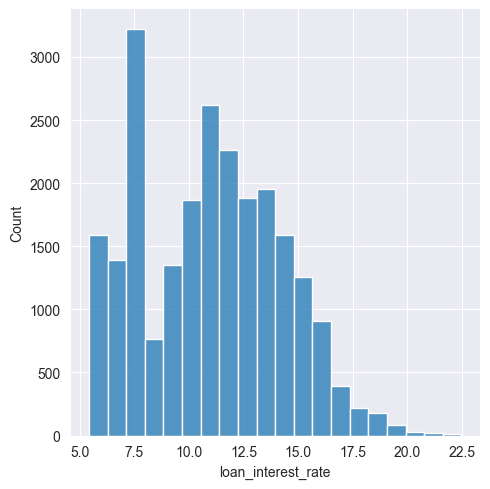

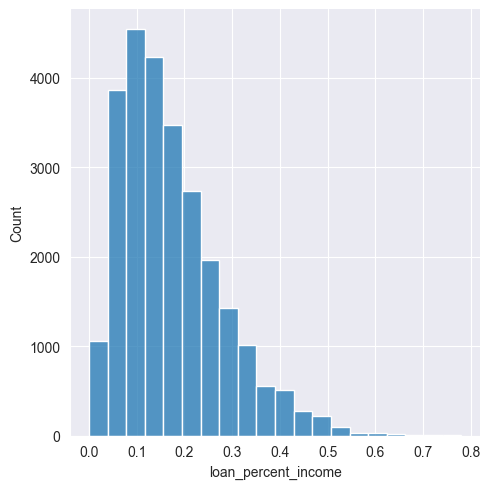

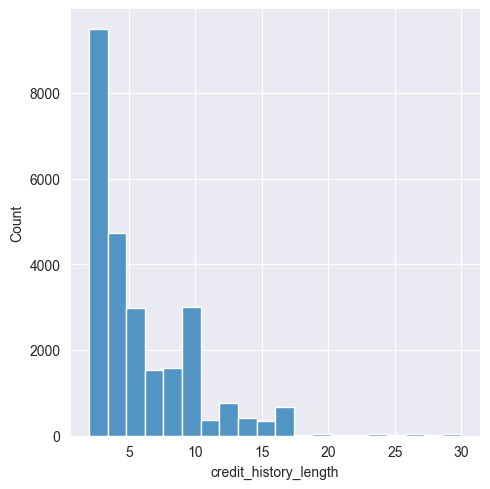

In [29]:
%matplotlib inline

col = []
for col in NUMERICAL_COLUMNS:
    sns.displot(X_train_numerical[col], bins=20)

In [32]:
"""
Plot diatas menunjukkan distribusi yang skewed ke kanan. Maka, untuk strategi imputasi yang bisa dilakukan
ialah dengan imputasi data median pada nilai null
"""

'\nPlot diatas menunjukkan distribusi yang skewed ke kanan. Maka, untuk strategi imputasi yang bisa dilakukan\nialah dengan imputasi data median pada nilai null\n'

<Axes: xlabel='loan_status', ylabel='count'>

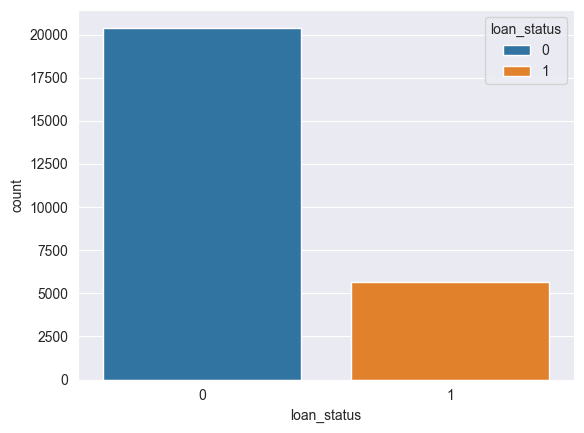

In [31]:
sns.countplot(data=y_train.to_frame(), x="loan_status", hue="loan_status")


In [34]:
"""
Terdapat class imbalance pada data y_train. Untuk mengatasi hal ini maka dapat dilakukan oversampling pada data
"""

'\nTerdapat class imbalance pada data y_train. Untuk mengatasi hal ini maka dapat dilakukan oversampling pada data\n'

In [33]:
"""
Terdapat data null pada feature person_emp_length, dan loan_int_rate. Maka akan
dilakukan proses imputasi atau deletion pada rows. Untuk strategi imputasi sendiri akan dipilih median,
karena plot diatas menunjukkan bahwa data cenderung skewed dan bukan distribusi normal
"""

'\nTerdapat data null pada feature person_emp_length, dan loan_int_rate. Maka akan\ndilakukan proses imputasi atau deletion pada rows. Untuk strategi imputasi sendiri akan dipilih median,\nkarena plot diatas menunjukkan bahwa data cenderung skewed dan bukan distribusi normal\n'